# Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.
Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict 
the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in
increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches.
Hence, it will be required to treat them accordingly. 

### Import data

In [1]:
import pandas as pd
train = pd.read_csv(r'C:\Users\Prasad\Downloads\train_v9rqX0R.csv')
test = pd.read_csv(r'C:\Users\Prasad\Downloads\test_AbJTz2l.csv')
data = train.append(test)
data.head()

C:\Users\Prasad\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [83]:
#join data
print(train.shape)
print(test.shape)
print(data.shape)

(8523, 12)
(5681, 11)
(14204, 12)


In [84]:
#importing libraries
import numpy as np
import pandas as pd
from math import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib as plt
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


### checking null values

In [86]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

### categorical data preprocessing

In [87]:
replace = data.Outlet_Size.value_counts().argmax()
data['Outlet_Size'].fillna(replace, inplace=True)

C:\Users\Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


### Numerical data preprocessing

In [88]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
data[['Item_Weight']] = imputer.fit_transform(data[['Item_Weight']])
data[['Item_Outlet_Sales']] = imputer.fit_transform(data[['Item_Outlet_Sales']])

C:\Users\Prasad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [89]:
data.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
dtype: int64

In [90]:
print(data['Item_Fat_Content'].unique())
print(data['Item_Identifier'].unique())
print(data['Item_MRP'].unique())
print(data['Item_Outlet_Sales'].unique())
print(data['Item_Type'].unique())
print(data['Item_Visibility'].unique())
print(data['Outlet_Establishment_Year'].unique())
print(data['Outlet_Identifier'].unique())
print(data['Outlet_Location_Type'].unique())
print(data['Outlet_Size'].unique())
print(data['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
[249.8092  48.2692 141.618  ...  72.8696  82.125  188.053 ]
[3735.138       443.4228     2097.27       ... 3608.636      2778.3834
 2181.28891358]
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[0.0160473  0.01927822 0.01676007 ... 0.1429909  0.07352856 0.10472015]
[1999 2009 1998 1987 1985 2002 2007 1997 2004]
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Tier 1' 'Tier 3' 'Tier 2']
['Medium' 'High' 'Small']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


### Label encoding

In [91]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['Item_Fat_Content']= label_encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Identifier']= label_encoder.fit_transform(data['Item_Identifier'])
data['Item_Type']= label_encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']= label_encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Location_Type']= label_encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Size']= label_encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Type']= label_encoder.fit_transform(data['Outlet_Type'])


### Important feature selection

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')


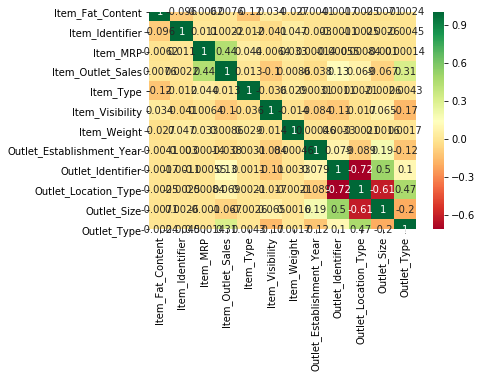

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
print(top_corr_features)
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### dropping unneccesary columns


In [93]:
drp=['Outlet_Identifier','Outlet_Location_Type','Outlet_Establishment_Year',
     'Outlet_Size','Outlet_Type']
data.drop(drp,inplace=True, axis=1)

In [94]:
print(data.head())

   Item_Fat_Content  Item_Identifier  Item_MRP  Item_Outlet_Sales  Item_Type  \
0                 1              156  249.8092          3735.1380          4   
1                 2                8   48.2692           443.4228         14   
2                 1              662  141.6180          2097.2700         10   
3                 2             1121  182.0950           732.3800          6   
4                 1             1297   53.8614           994.7052          9   

   Item_Visibility  Item_Weight  
0         0.016047         9.30  
1         0.019278         5.92  
2         0.016760        17.50  
3         0.000000        19.20  
4         0.000000         8.93  


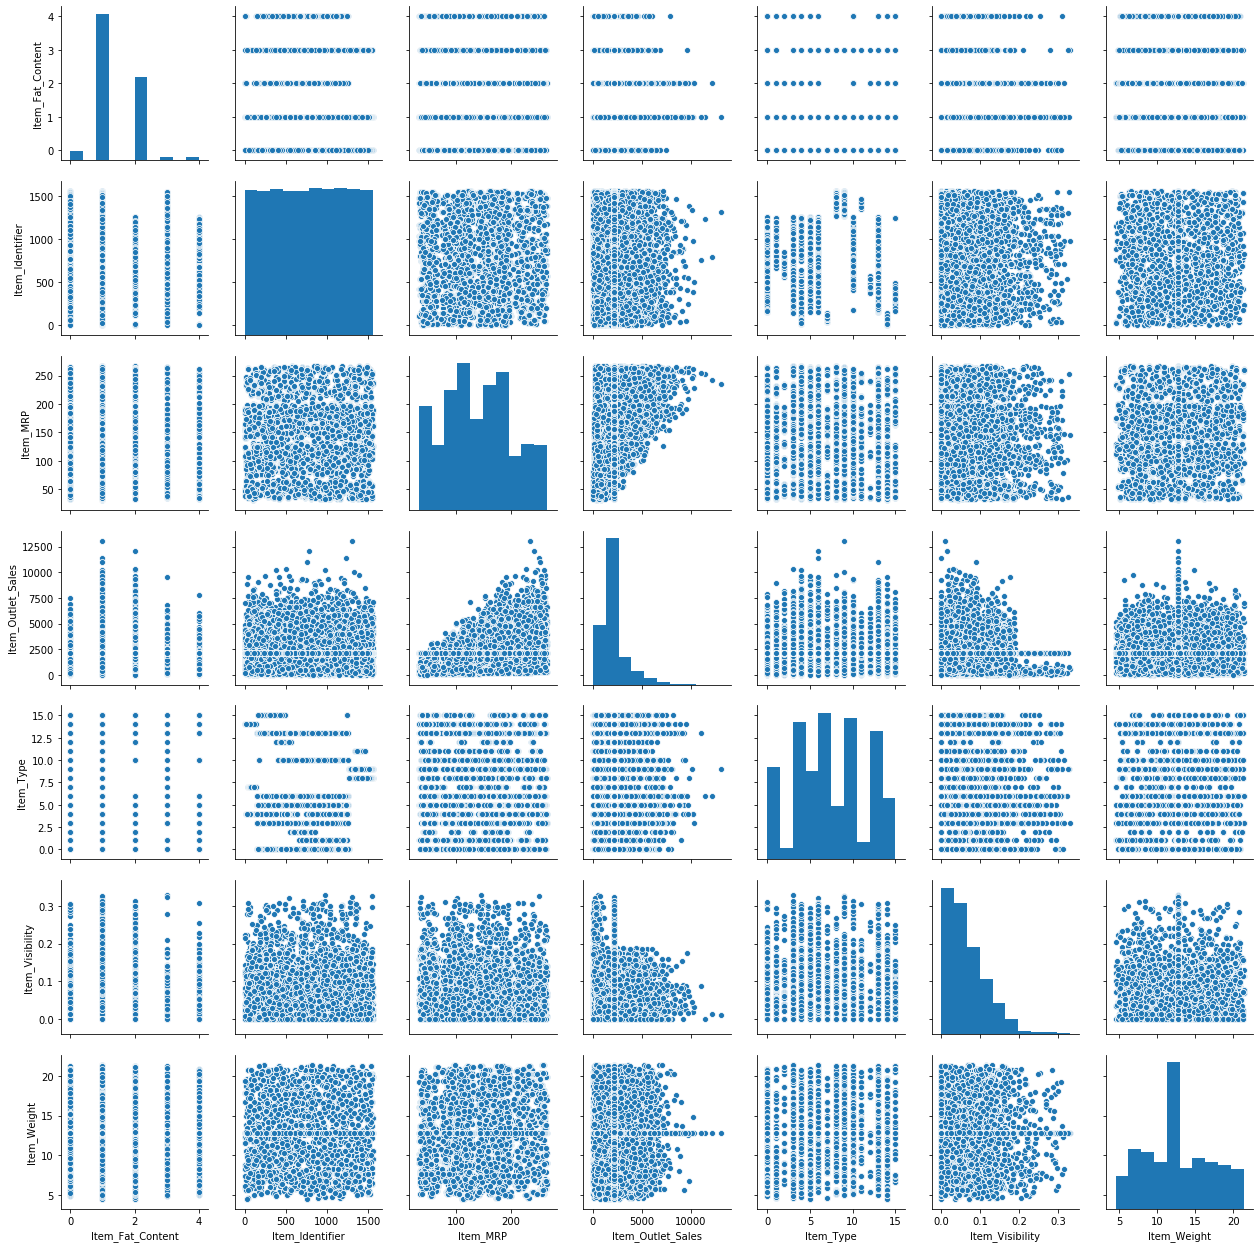

In [95]:
import seaborn as sns
sns.pairplot(data)

### Train and Test split

In [96]:
from sklearn import tree 
X = data.iloc[:,[0,1,2,4,5,6]]  #independent columns
y = data.iloc[:,3]
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.399957)
knn=KNeighborsRegressor(n_neighbors = 5,weights='uniform',algorithm='auto')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_pred)

[1722.60900543 2297.06124543 3028.64228543 ... 3146.33010272 2441.96494815
 3033.41042272]


In [97]:
print(y_pred.shape)

(5681,)


### submission file


In [101]:
test1= pd.read_csv(r'C:\Users\Prasad\Downloads\test_AbJTz2l.csv')
Item_Identifier=test1['Item_Identifier']
outlet_identifier=test1['Outlet_Identifier']
Item_Outlet_Sale=y_pred

In [102]:
submission=pd.DataFrame({'Item_Identifier':Item_Identifier,'Outlet_Identifier':outlet_identifier,'Item_Outlet_Sales':Item_Outlet_Sale})
submission.to_csv('Regression.csv',index=False)